<center font-size="20px"><b font-size="20px">Bike Sharing Assignment Case Study</b></center>

<center><b>Authors</b></center>
<center>Ravi Pandey, Neha Bansal</center>

<b> Problem Statement: </b> <br />
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

<b>Business Goal: </b> <br />
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 150)
%matplotlib inline


In [2]:
bikedata=pd.read_csv("day.csv")

In [3]:
bikedata.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
bikedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### Check for missing values and Duplicate Values

In [5]:
print(bikedata.isnull().sum())
bike_ = bikedata.copy()
bike_.drop_duplicates(subset=None, inplace=True)
print("Bike Data Shape",bike_.shape)

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
Bike Data Shape (730, 16)


## Observation 

* Dataset has 730 rows and 16 columns <br />
* Except One column other Columns are float and int data type <br />
* There are no missing values in the dataset <br />
* There are no duplicate data found in the dataset

## Removing Columns
By looking into the data i found that below columns which we can ignore <br />
* instant : index value <br/>
* dteday : We already have seprated columns for month and year hence ignoring this deteday column <br/>
* Casual & Registered: : cnt is a dervied column for both casual and registerd hence we can ignore both columns


In [6]:
bike_clean=bikedata[['season', 'yr', 'mnth', 'holiday', 'weekday','workingday', 'weathersit', 
                     'temp', 'atemp', 'hum', 'windspeed','cnt']]

## Univariate Analysis

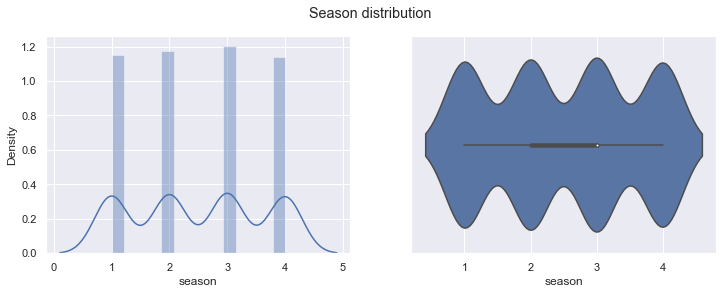

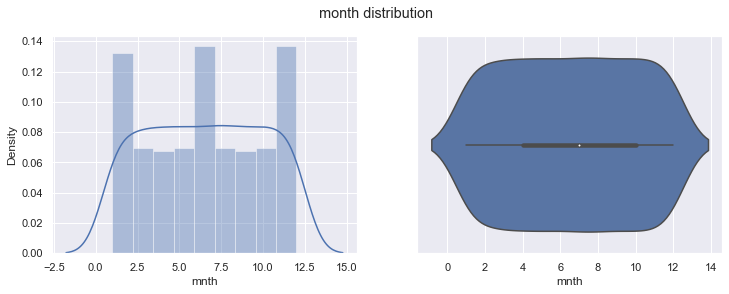

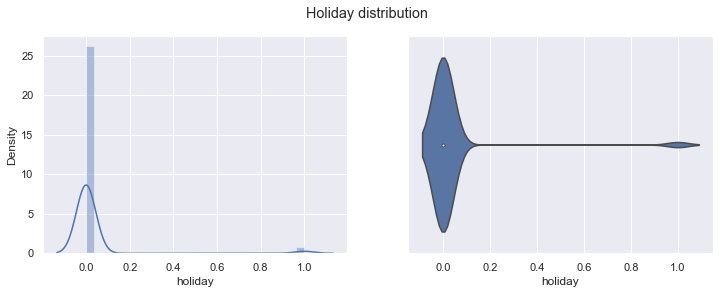

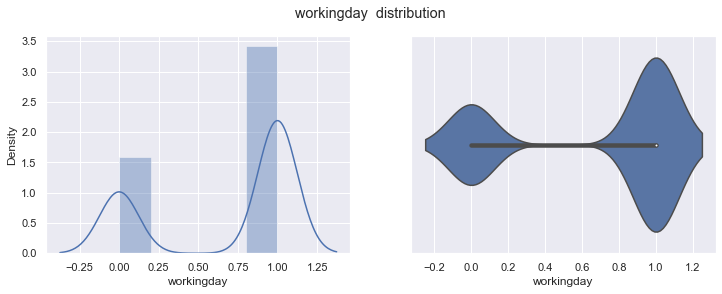

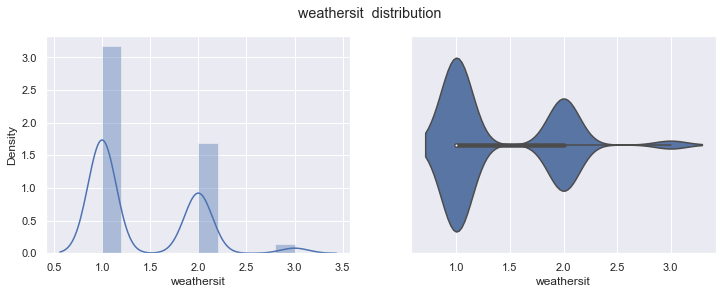

In [7]:
sns.set(rc={"figure.figsize": (12, 4)});
plt.subplot(1,2,1)
ax = sns.distplot(bike_clean.season)
plt.suptitle('Season distribution')
plt.subplot(1,2,2)
ax1=sns.violinplot(x=bike_clean["season"])
plt.show()


sns.set(rc={"figure.figsize": (12, 4)});
plt.subplot(1,2,1)
ax = sns.distplot(bike_clean.mnth)
plt.suptitle('month distribution')
plt.subplot(1,2,2)
ax1=sns.violinplot(x=bike_clean["mnth"])
plt.show()

sns.set(rc={"figure.figsize": (12, 4)});
plt.subplot(1,2,1)
ax = sns.distplot(bike_clean.holiday)
plt.suptitle('Holiday distribution')
plt.subplot(1,2,2)
ax1=sns.violinplot(x=bike_clean["holiday"])
plt.show()

sns.set(rc={"figure.figsize": (12, 4)});
plt.subplot(1,2,1)
ax = sns.distplot(bike_clean.workingday )
plt.suptitle('workingday  distribution')
plt.subplot(1,2,2)
ax1=sns.violinplot(x=bike_clean["workingday"])
plt.show()

sns.set(rc={"figure.figsize": (12, 4)});
plt.subplot(1,2,1)
ax = sns.distplot(bike_clean.weathersit)
plt.suptitle('weathersit  distribution')
plt.subplot(1,2,2)
ax1=sns.violinplot(x=bike_clean["weathersit"])
plt.show()



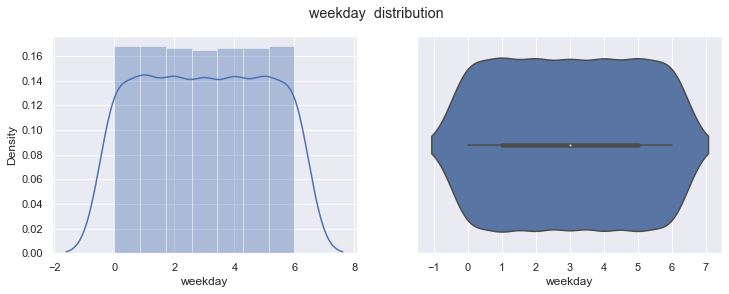

In [8]:
sns.set(rc={"figure.figsize": (12, 4)});
plt.subplot(1,2,1)
ax = sns.distplot(bike_clean.weekday)
plt.suptitle('weekday  distribution')
plt.subplot(1,2,2)
ax1=sns.violinplot(x=bike_clean["weekday"])
plt.show()


## Observation
* Most of the bike booking happening in season 3
* Most of the bike booking month range between 6 to 8
* Bike booking is happening when there is holiday value=0
* most of the Bike booking happening when thers is a working day
* Weekday is independent, All the days have marginly same count

## Bivariate Analysis

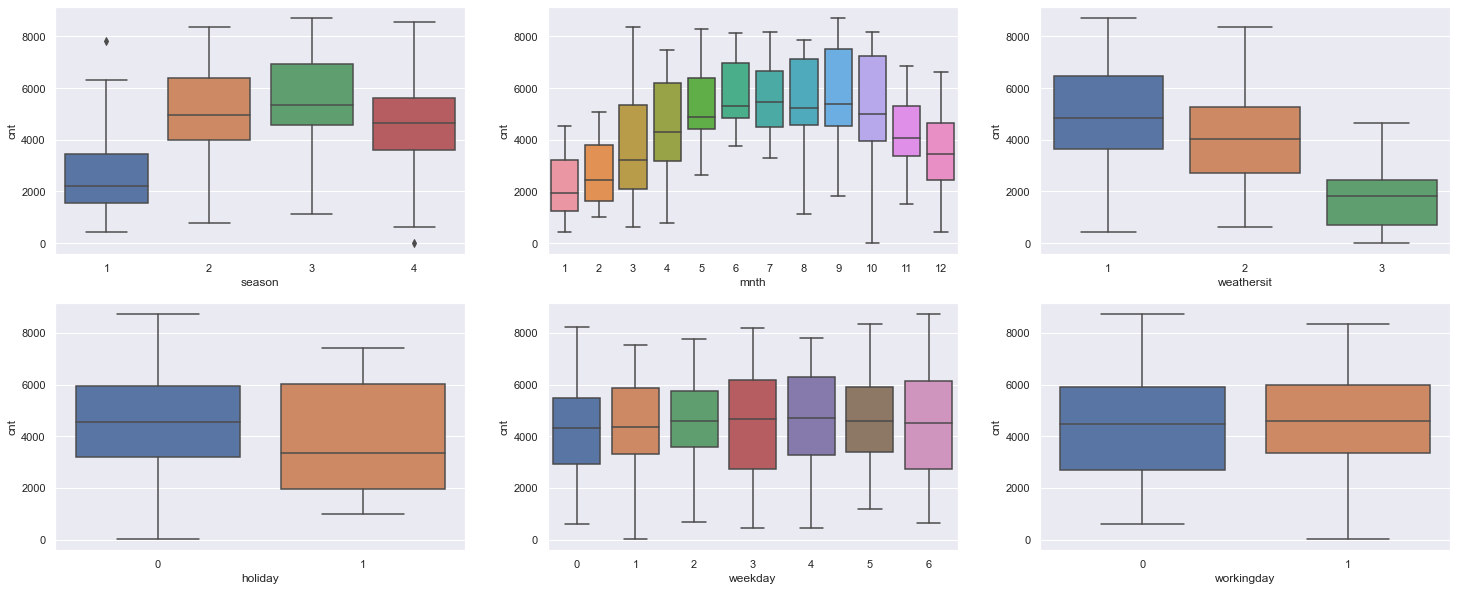

In [9]:
plt.figure(figsize=(25, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_clean)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_clean)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_clean)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_clean)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_clean)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_clean)
plt.show()

## Observation
* Over 5K booking is happening on the Season3, Season2 and Season 4 wherease we observe that less then 3.5k booking is happening on season 1
* Over 4k boking happening on the range between 4 to 10.
* Over 4k booking is only happening in weathersit 1.
* most of the Bike booking happening when thers is a working day
* Weekday is independent, All the days have marginly same count

## Visualising Relation btween numerical values

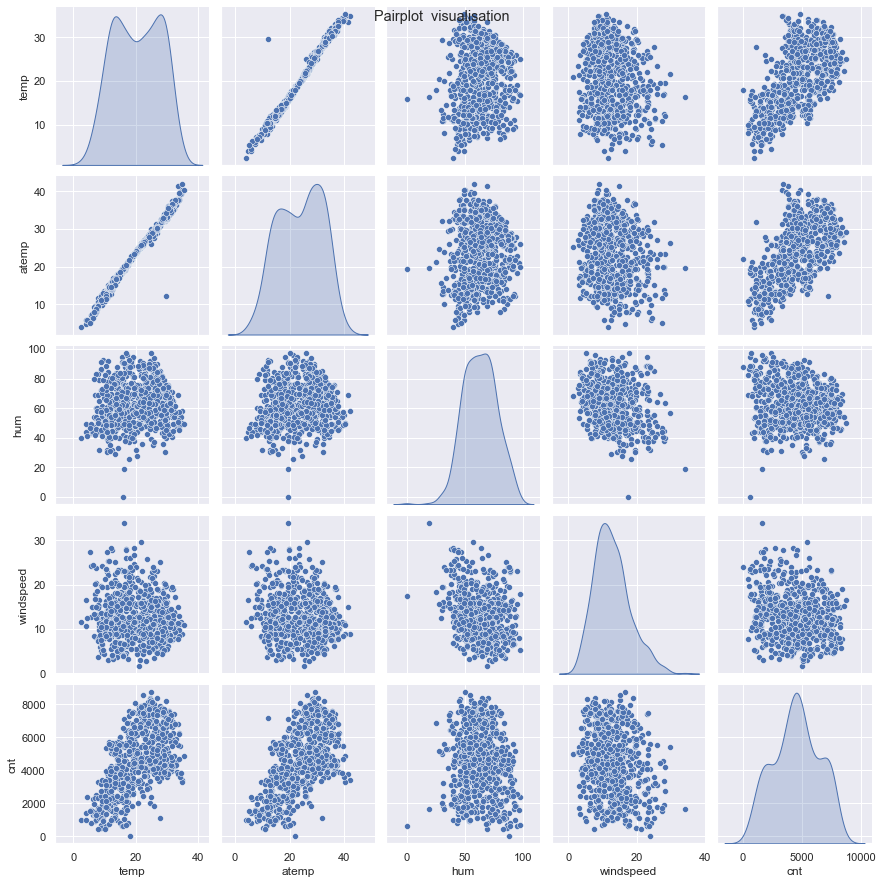

In [10]:
sns.pairplot(bike_clean[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']], diag_kind='kde')
plt.suptitle('Pairplot  visualisation')
plt.show()


## Observation
Above pair plot tells us that there is a linear relationship between <b> cnt,atemp and temp </b>

## Correlation Analysis

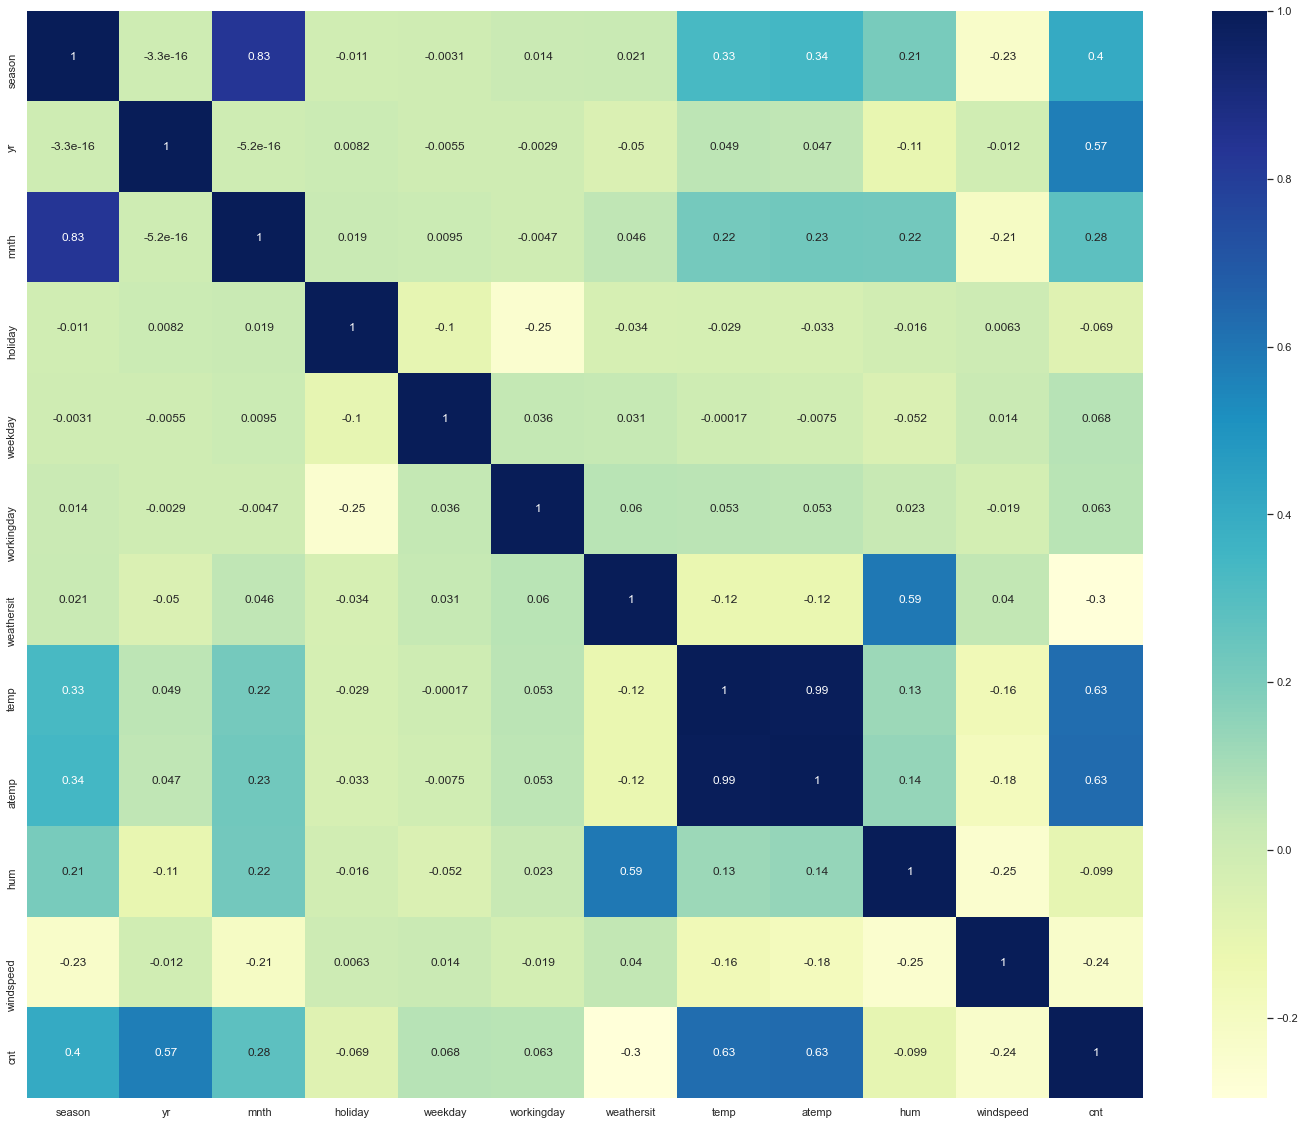

In [11]:
plt.figure(figsize = (25,20))
sns.heatmap(bike_clean.corr(), annot = True, cmap="YlGnBu")
plt.show()

## Observation
* temp and atemp are highly corelated so for the further analysis we can drop the column atemp

## Dummy Variable creation
By Looking into the Data Description we found that we have categorical variables too, So let's create Dummy Variable for columns 'mnth', 'weekday', 'season' and 'weathersit'. Let's convert daat type to category first

In [12]:
bike_clean['season']=bike_clean['season'].astype('category')
bike_clean['weathersit']=bike_clean['weathersit'].astype('category')
bike_clean['mnth']=bike_clean['mnth'].astype('category')
bike_clean['weekday']=bike_clean['weekday'].astype('category')

In [13]:
bike_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


In [14]:
bike_clean = pd.get_dummies(bike_clean, drop_first=True)
bike_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    uint8  
 9   season_3      730 non-null    uint8  
 10  season_4      730 non-null    uint8  
 11  mnth_2        730 non-null    uint8  
 12  mnth_3        730 non-null    uint8  
 13  mnth_4        730 non-null    uint8  
 14  mnth_5        730 non-null    uint8  
 15  mnth_6        730 non-null    uint8  
 16  mnth_7        730 non-null    uint8  
 17  mnth_8        730 non-null    uint8  
 18  mnth_9        730 non-null    

<b>Above code does below: </b> <br />
get_dummies function will create dummy variable for all category data type variable <br />
Drop original variable from which the dummy variable are created
drop_first=True, We did True because importance or value of that left over variable can be found by remaining variables .So to avoid redundancy we are dropping a column. for ex: I have 3 friends Neha, Niti and Nitya and if i am introducing Neha and Niti to my brother, then automatically my brother know who is Nitya. So once we create dummies for n-1 categories it’s definite what the nth category is 
    

In [15]:
bike_clean.shape

(730, 30)

In [16]:
bike_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    uint8  
 9   season_3      730 non-null    uint8  
 10  season_4      730 non-null    uint8  
 11  mnth_2        730 non-null    uint8  
 12  mnth_3        730 non-null    uint8  
 13  mnth_4        730 non-null    uint8  
 14  mnth_5        730 non-null    uint8  
 15  mnth_6        730 non-null    uint8  
 16  mnth_7        730 non-null    uint8  
 17  mnth_8        730 non-null    uint8  
 18  mnth_9        730 non-null    

## Spliting the data

In [17]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
train, test = train_test_split(bike_clean, train_size = 0.80, test_size = 0.20, random_state = 101)

train_size = 0.80 mean we are taking 80% of data for training <br />
test_size = 0.20 mean we are taking 20% of data for testing <br/>
101 is just a random number that helps to reproduce the same result after reuse the train_test_split <br />
If we want, we can choose other numbers as well

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 584 entries, 23 to 523
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            584 non-null    int64  
 1   holiday       584 non-null    int64  
 2   workingday    584 non-null    int64  
 3   temp          584 non-null    float64
 4   atemp         584 non-null    float64
 5   hum           584 non-null    float64
 6   windspeed     584 non-null    float64
 7   cnt           584 non-null    int64  
 8   season_2      584 non-null    uint8  
 9   season_3      584 non-null    uint8  
 10  season_4      584 non-null    uint8  
 11  mnth_2        584 non-null    uint8  
 12  mnth_3        584 non-null    uint8  
 13  mnth_4        584 non-null    uint8  
 14  mnth_5        584 non-null    uint8  
 15  mnth_6        584 non-null    uint8  
 16  mnth_7        584 non-null    uint8  
 17  mnth_8        584 non-null    uint8  
 18  mnth_9        584 non-null   

In [19]:
print("Train Shape:",train.shape,"Test Shape:",test.shape)

Train Shape: (584, 30) Test Shape: (146, 30)


## Feature Scaling
we are using feature scaling for normalizing the range of independent variables or features of data

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


In [21]:
## Let's apply scaler on all the numerical variables except yr,holiday,workingday because they are already scaled

sc = ['temp', 'atemp', 'hum', 'windspeed','cnt']

train[sc] = scaler.fit_transform(train[sc])

In [22]:
train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
23,0,0,1,0.047675,0.051010,0.388271,0.280244,0.163366,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
527,1,0,1,0.740406,0.681002,0.824813,0.396136,0.580101,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
257,0,0,1,0.645914,0.622978,0.666134,0.512820,0.426228,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
18,0,0,1,0.290384,0.287930,0.707760,0.383295,0.190789,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
148,0,0,0,0.758058,0.704203,0.806176,0.394883,0.558537,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Building a Linear Model

In [23]:
y = train["cnt"]
x=train.loc[:, train.columns != 'cnt']

## Feature Selection
* RFE with cross-validation

In [24]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import GradientBoostingRegressor

In [25]:
rfecv = RFECV(GradientBoostingRegressor())
rfecv.fit(x,y)
rfecv.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True, False, False,  True, False,  True, False,  True,
        True, False,  True,  True, False, False,  True,  True,  True,
        True,  True])

In [26]:
x_refcv=x.iloc[:,rfecv.get_support()]

In [27]:
x.columns[~rfecv.get_support()]

Index(['season_3', 'mnth_3', 'mnth_4', 'mnth_6', 'mnth_8', 'mnth_11',
       'weekday_2', 'weekday_3'],
      dtype='object')

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def checkVIF(x):
    vif = pd.DataFrame()
    vif['Features'] = x.columns
    vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif
    

In [29]:
print(checkVIF(x_refcv))

        Features      VIF
4          atemp  1334.02
3           temp  1288.17
5            hum    15.32
2     workingday     6.54
6      windspeed     4.79
8       season_4     2.73
7       season_2     2.54
19  weathersit_2     2.40
0             yr     2.01
18     weekday_6     1.88
13       mnth_10     1.80
11        mnth_7     1.69
15     weekday_1     1.65
16     weekday_4     1.56
10        mnth_5     1.55
14       mnth_12     1.50
17     weekday_5     1.50
12        mnth_9     1.40
1        holiday     1.39
20  weathersit_3     1.36
9         mnth_2     1.33


In [30]:
import statsmodels.api as sm
X_train = sm.add_constant(x_refcv)
lr1 = sm.OLS(y, X_train).fit()

In [31]:
lr1.params

const           0.189666
yr              0.234447
holiday        -0.068231
workingday      0.026840
temp            0.310803
atemp           0.284328
hum            -0.171485
windspeed      -0.177442
season_2        0.068634
season_4        0.125551
mnth_2         -0.024296
mnth_5          0.022553
mnth_7         -0.027418
mnth_9          0.095639
mnth_10         0.036689
mnth_12        -0.014450
weekday_1      -0.012787
weekday_4       0.006747
weekday_5       0.010414
weekday_6       0.044262
weathersit_2   -0.044889
weathersit_3   -0.215488
dtype: float64

In [32]:
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     139.0
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          1.01e-206
Time:                        18:07:49   Log-Likelihood:                 573.98
No. Observations:                 584   AIC:                            -1104.
Df Residuals:                     562   BIC:                            -1008.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1897      0.025      7.480   

## Observation
In above Summary and correlation Matrix we already seen that atemp and temp are highly correlated and VIF and p-value is also high for both,So let's drop atemp 

In [33]:
x_new = x_refcv.drop(["atemp"], axis = 1)

In [34]:
print(checkVIF(x_new))

        Features    VIF
4            hum  13.96
3           temp  11.01
2     workingday   6.54
5      windspeed   4.46
7       season_4   2.63
6       season_2   2.45
18  weathersit_2   2.32
0             yr   2.01
17     weekday_6   1.87
12       mnth_10   1.80
10        mnth_7   1.69
14     weekday_1   1.64
15     weekday_4   1.56
9         mnth_5   1.54
13       mnth_12   1.50
16     weekday_5   1.50
11        mnth_9   1.39
1        holiday   1.38
8         mnth_2   1.32
19  weathersit_3   1.31


In [35]:
## Model 2
X_train2 = sm.add_constant(x_new)
lr2 = sm.OLS(y, X_train2).fit()
lr2.params

const           0.192143
yr              0.234767
holiday        -0.070938
workingday      0.026533
temp            0.575095
hum            -0.164706
windspeed      -0.185589
season_2        0.071084
season_4        0.128147
mnth_2         -0.022831
mnth_5          0.021860
mnth_7         -0.027399
mnth_9          0.094194
mnth_10         0.037393
mnth_12        -0.014110
weekday_1      -0.011956
weekday_4       0.007263
weekday_5       0.010857
weekday_6       0.044212
weathersit_2   -0.046897
weathersit_3   -0.220768
dtype: float64

In [36]:
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     145.8
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          1.57e-207
Time:                        18:07:49   Log-Likelihood:                 573.30
No. Observations:                 584   AIC:                            -1105.
Df Residuals:                     563   BIC:                            -1013.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1921      0.025      7.603   

In [37]:
## Hum having highest VIF let's drop hum

In [38]:
## Model3

In [39]:
x_new = x_refcv.drop(["atemp","hum"], axis = 1)
print(checkVIF(x_new))

        Features   VIF
3           temp  7.33
2     workingday  6.25
4      windspeed  4.40
6       season_4  2.49
5       season_2  2.45
0             yr  2.01
16     weekday_6  1.82
11       mnth_10  1.80
9         mnth_7  1.67
13     weekday_1  1.64
14     weekday_4  1.56
17  weathersit_2  1.55
8         mnth_5  1.53
15     weekday_5  1.50
12       mnth_12  1.46
10        mnth_9  1.38
1        holiday  1.36
7         mnth_2  1.29
18  weathersit_3  1.10


In [40]:
## Model 3
X_train3 = sm.add_constant(x_new)
lr3 = sm.OLS(y, X_train3).fit()
lr3.params

const           0.108483
yr              0.240615
holiday        -0.071267
workingday      0.030044
temp            0.550536
windspeed      -0.145489
season_2        0.075140
season_4        0.122659
mnth_2         -0.018998
mnth_5          0.008269
mnth_7         -0.020820
mnth_9          0.083411
mnth_10         0.032385
mnth_12        -0.019247
weekday_1      -0.013816
weekday_4       0.008073
weekday_5       0.012808
weekday_6       0.048797
weathersit_2   -0.079739
weathersit_3   -0.292800
dtype: float64

In [41]:
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     145.1
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          1.01e-202
Time:                        18:07:49   Log-Likelihood:                 559.13
No. Observations:                 584   AIC:                            -1078.
Df Residuals:                     564   BIC:                            -990.9
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1085      0.020      5.375   

temp is require for our Bike sharing analysis hence we are not droping temp although it is having highest VIF,let's drop mnth_5 which have high p value

In [42]:
x_new = x_refcv.drop(["atemp","hum","mnth_5"], axis = 1)
print(checkVIF(x_new))

        Features   VIF
3           temp  7.23
2     workingday  6.25
4      windspeed  4.35
6       season_4  2.49
0             yr  2.00
5       season_2  2.00
15     weekday_6  1.82
10       mnth_10  1.80
8         mnth_7  1.66
12     weekday_1  1.64
13     weekday_4  1.56
16  weathersit_2  1.55
14     weekday_5  1.50
11       mnth_12  1.46
9         mnth_9  1.37
1        holiday  1.36
7         mnth_2  1.29
17  weathersit_3  1.10


In [43]:
## Model 4
X_train4 = sm.add_constant(x_new)
lr4 = sm.OLS(y, X_train4).fit()
lr4.params

const           0.108137
yr              0.240572
holiday        -0.070668
workingday      0.030129
temp            0.551789
windspeed      -0.146389
season_2        0.077735
season_4        0.122706
mnth_2         -0.018696
mnth_7         -0.021288
mnth_9          0.083080
mnth_10         0.032283
mnth_12        -0.019107
weekday_1      -0.014031
weekday_4       0.007992
weekday_5       0.012701
weekday_6       0.048643
weathersit_2   -0.079554
weathersit_3   -0.292885
dtype: float64

In [44]:
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     153.3
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          9.12e-204
Time:                        18:07:50   Log-Likelihood:                 559.01
No. Observations:                 584   AIC:                            -1080.
Df Residuals:                     565   BIC:                            -997.0
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1081      0.020      5.365   

In [45]:
x_new = x_refcv.drop(["atemp","hum","mnth_5","mnth_10"], axis = 1)
print(checkVIF(x_new))

        Features   VIF
3           temp  7.11
2     workingday  6.24
4      windspeed  4.35
0             yr  2.00
5       season_2  1.97
14     weekday_6  1.82
6       season_4  1.71
8         mnth_7  1.65
11     weekday_1  1.63
12     weekday_4  1.56
15  weathersit_2  1.54
13     weekday_5  1.50
1        holiday  1.36
9         mnth_9  1.32
7         mnth_2  1.29
10       mnth_12  1.28
16  weathersit_3  1.10


In [46]:
## Model 4
X_train5 = sm.add_constant(x_new)
lr5 = sm.OLS(y, X_train5).fit()
lr5.params

const           0.106049
yr              0.239878
holiday        -0.071907
workingday      0.029717
temp            0.557192
windspeed      -0.144736
season_2        0.075653
season_4        0.135355
mnth_2         -0.019114
mnth_7         -0.024345
mnth_9          0.077491
mnth_12        -0.028712
weekday_1      -0.013004
weekday_4       0.008162
weekday_5       0.013533
weekday_6       0.049744
weathersit_2   -0.078285
weathersit_3   -0.291219
dtype: float64

In [47]:
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     161.6
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          3.08e-204
Time:                        18:07:50   Log-Likelihood:                 557.47
No. Observations:                 584   AIC:                            -1079.
Df Residuals:                     566   BIC:                            -1000.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1060      0.020      5.262   

In [48]:
x_new = x_refcv.drop(["atemp","hum","mnth_10","weekday_1"], axis = 1)
print(checkVIF(x_new))

        Features   VIF
3           temp  7.20
2     workingday  5.43
4      windspeed  4.40
5       season_2  2.42
0             yr  1.99
14     weekday_6  1.82
6       season_4  1.71
9         mnth_7  1.65
15  weathersit_2  1.54
8         mnth_5  1.52
12     weekday_4  1.38
13     weekday_5  1.34
10        mnth_9  1.32
7         mnth_2  1.29
11       mnth_12  1.28
1        holiday  1.15
16  weathersit_3  1.10


In [49]:
## Model 4
X_train6 = sm.add_constant(x_new)
lr6 = sm.OLS(y, X_train6).fit()
lr6.params

const           0.106079
yr              0.239612
holiday        -0.082892
workingday      0.025591
temp            0.556513
windspeed      -0.143766
season_2        0.073236
season_4        0.135885
mnth_2         -0.019329
mnth_5          0.008491
mnth_7         -0.023746
mnth_9          0.077958
mnth_12        -0.029230
weekday_4       0.012418
weekday_5       0.017774
weekday_6       0.049884
weathersit_2   -0.078638
weathersit_3   -0.290344
dtype: float64

In [50]:
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     161.4
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          4.39e-204
Time:                        18:07:50   Log-Likelihood:                 557.11
No. Observations:                 584   AIC:                            -1078.
Df Residuals:                     566   BIC:                            -999.6
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1061      0.020      5.258   

In [51]:
x_new = x_refcv.drop(["atemp","hum","mnth_10","weekday_1","mnth_5"], axis = 1)
print(checkVIF(x_new))

        Features   VIF
3           temp  7.11
2     workingday  5.43
4      windspeed  4.35
0             yr  1.99
5       season_2  1.97
13     weekday_6  1.81
6       season_4  1.71
8         mnth_7  1.65
14  weathersit_2  1.54
11     weekday_4  1.38
12     weekday_5  1.34
9         mnth_9  1.32
7         mnth_2  1.29
10       mnth_12  1.28
1        holiday  1.15
15  weathersit_3  1.10


In [52]:
## Model 7
X_train7 = sm.add_constant(x_new)
lr7 = sm.OLS(y, X_train7).fit()
lr7.params

const           0.105726
yr              0.239565
holiday        -0.082456
workingday      0.025608
temp            0.557792
windspeed      -0.144695
season_2        0.075912
season_4        0.135901
mnth_2         -0.019016
mnth_7         -0.024214
mnth_9          0.077638
mnth_12        -0.029061
weekday_4       0.012408
weekday_5       0.017734
weekday_6       0.049721
weathersit_2   -0.078455
weathersit_3   -0.290422
dtype: float64

In [53]:
print(lr7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     171.7
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          3.75e-205
Time:                        18:07:50   Log-Likelihood:                 556.97
No. Observations:                 584   AIC:                            -1080.
Df Residuals:                     567   BIC:                            -1006.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1057      0.020      5.247   

In [54]:
x_new = x_refcv.drop(["atemp","hum","mnth_10","weekday_1","mnth_5","mnth_7","mnth_2","mnth_12"], axis = 1)
print(checkVIF(x_new))

        Features   VIF
2     workingday  5.26
3           temp  5.01
4      windspeed  4.01
0             yr  1.97
10     weekday_6  1.78
5       season_2  1.61
11  weathersit_2  1.52
6       season_4  1.41
8      weekday_4  1.37
9      weekday_5  1.34
7         mnth_9  1.20
1        holiday  1.14
12  weathersit_3  1.10


In [55]:
## Model 7
X_train8 = sm.add_constant(x_new)
lr8 = sm.OLS(y, X_train8).fit()
lr8.params

const           0.095029
yr              0.239569
holiday        -0.082059
workingday      0.025762
temp            0.557831
windspeed      -0.141101
season_2        0.085372
season_4        0.137673
mnth_9          0.087075
weekday_4       0.012122
weekday_5       0.016433
weekday_6       0.049368
weathersit_2   -0.078261
weathersit_3   -0.292801
dtype: float64

In [56]:
print(lr8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     209.7
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          2.72e-207
Time:                        18:07:50   Log-Likelihood:                 553.83
No. Observations:                 584   AIC:                            -1080.
Df Residuals:                     570   BIC:                            -1018.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0950      0.019      5.026   

In [57]:
x_new = x_refcv.drop(["atemp","hum","mnth_10","weekday_1","mnth_5","mnth_7","mnth_2","mnth_12","weekday_4"
                     ,"weekday_5"], axis = 1)
print(checkVIF(x_new))

        Features   VIF
3           temp  5.00
2     workingday  4.55
4      windspeed  4.00
0             yr  1.97
8      weekday_6  1.78
5       season_2  1.60
9   weathersit_2  1.52
6       season_4  1.41
7         mnth_9  1.20
1        holiday  1.13
10  weathersit_3  1.09


In [58]:
## Model 7
X_train9 = sm.add_constant(x_new)
lr9 = sm.OLS(y, X_train9).fit()
lr9.params

const           0.095094
yr              0.239693
holiday        -0.079532
workingday      0.031641
temp            0.557184
windspeed      -0.140977
season_2        0.085657
season_4        0.137658
mnth_9          0.088264
weekday_6       0.049503
weathersit_2   -0.078118
weathersit_3   -0.296165
dtype: float64

In [59]:
print(lr9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     247.5
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          3.37e-209
Time:                        18:07:50   Log-Likelihood:                 552.68
No. Observations:                 584   AIC:                            -1081.
Df Residuals:                     572   BIC:                            -1029.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0951      0.019      5.030   

In [60]:
x_new = x_refcv.drop(["atemp","hum","mnth_10","weekday_1","mnth_5","mnth_7","mnth_2","mnth_12","weekday_4"
                     ,"weekday_5","holiday"], axis = 1)
print(checkVIF(x_new))

       Features   VIF
2          temp  4.88
1    workingday  4.16
3     windspeed  3.88
0            yr  1.97
7     weekday_6  1.69
4      season_2  1.60
8  weathersit_2  1.52
5      season_4  1.40
6        mnth_9  1.20
9  weathersit_3  1.09


In [61]:
## Model 10
X_train10 = sm.add_constant(x_new)
lr10 = sm.OLS(y, X_train10).fit()
lr10.params

const           0.081705
yr              0.239268
workingday      0.044304
temp            0.558433
windspeed      -0.141369
season_2        0.085490
season_4        0.137173
mnth_9          0.088359
weekday_6       0.062189
weathersit_2   -0.076699
weathersit_3   -0.294653
dtype: float64

In [62]:
print(lr10.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     267.4
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          2.07e-208
Time:                        18:07:50   Log-Likelihood:                 547.93
No. Observations:                 584   AIC:                            -1074.
Df Residuals:                     573   BIC:                            -1026.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0817      0.019      4.410   

## Obeservation
In <b>Model 10 </b> we saw that there is very low Multicollinearity between the predictors and all p values are significant, so let's
consider this model as our final model.

In [63]:
 pd.read_html(lr10.summary().tables[1].as_html(),header=0,index_col=0)[0]["coef"]

const           0.0817
yr              0.2393
workingday      0.0443
temp            0.5584
windspeed      -0.1414
season_2        0.0855
season_4        0.1372
mnth_9          0.0884
weekday_6       0.0622
weathersit_2   -0.0767
weathersit_3   -0.2947
Name: coef, dtype: float64

<b>Hypothesis Testing states that:</b> <br />
$$
 H0:B1=B2=...=Bn=0 
$$ 

$$
 H1: Bi!=0
$$
 In lr10 we can see that our coef are not equal to 0 thus <b> We REJECT the NULL HYPOTHESIS </b>
 
<b>F-Statistics</b> <br />
 * F-statistic: 267.4
 * Prob (F-statistic): 2.07e-208
 In lr10 model F-statistic is greater than 1 and p-value is 0.000 hence the model is significant </b> <br />
 
<b>Equation of best fitted surface based on model lr10:</b>
 
 $$
 cnt = 0.0817 + (yr × 0.2393) + (workingday × 0.0443) + (temp × 0.5584) − (windspeed × 0.1414) + (season2 × 0.0855) + (season4 ×0.1372) + (mnth9 × 0.0884) + (weekday6 ×0.0622) − (weathersit2 × 0.0767) − (weathersit3 × 0.2947)
 $$

## Linear Regression Assumptions

### Residual Analysis on model

In [64]:
yPred = lr10.predict(X_train10)

Text(0.5, 0, 'Residual')

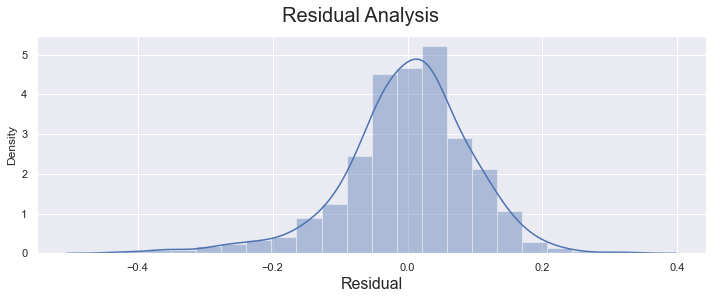

In [65]:
residual = y-yPred
fig = plt.figure()
sns.distplot((residual), bins = 20)
fig.suptitle('Residual Analysis', fontsize = 20)             
plt.xlabel('Residual', fontsize = 16)     

## Observation
From the above diagram we can state that Residual are normally distribuited so our assumption for Linear Regression is Valid

## Prediction Using Model lr10
Applying scalar transform on testset

In [66]:
test[sc]=scaler.transform(test[sc])

In [67]:
ytest = test["cnt"]
xtest=test.loc[:, test.columns != 'cnt']
xtest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 299 to 458
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            146 non-null    int64  
 1   holiday       146 non-null    int64  
 2   workingday    146 non-null    int64  
 3   temp          146 non-null    float64
 4   atemp         146 non-null    float64
 5   hum           146 non-null    float64
 6   windspeed     146 non-null    float64
 7   season_2      146 non-null    uint8  
 8   season_3      146 non-null    uint8  
 9   season_4      146 non-null    uint8  
 10  mnth_2        146 non-null    uint8  
 11  mnth_3        146 non-null    uint8  
 12  mnth_4        146 non-null    uint8  
 13  mnth_5        146 non-null    uint8  
 14  mnth_6        146 non-null    uint8  
 15  mnth_7        146 non-null    uint8  
 16  mnth_8        146 non-null    uint8  
 17  mnth_9        146 non-null    uint8  
 18  mnth_10       146 non-null  

In [68]:
sm.add_constant(xtest[x_new.columns]).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 299 to 458
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         146 non-null    float64
 1   yr            146 non-null    int64  
 2   workingday    146 non-null    int64  
 3   temp          146 non-null    float64
 4   windspeed     146 non-null    float64
 5   season_2      146 non-null    uint8  
 6   season_4      146 non-null    uint8  
 7   mnth_9        146 non-null    uint8  
 8   weekday_6     146 non-null    uint8  
 9   weathersit_2  146 non-null    uint8  
 10  weathersit_3  146 non-null    uint8  
dtypes: float64(3), int64(2), uint8(6)
memory usage: 7.7 KB


In [69]:
pred=lr10.predict(sm.add_constant(xtest[x_new.columns]))

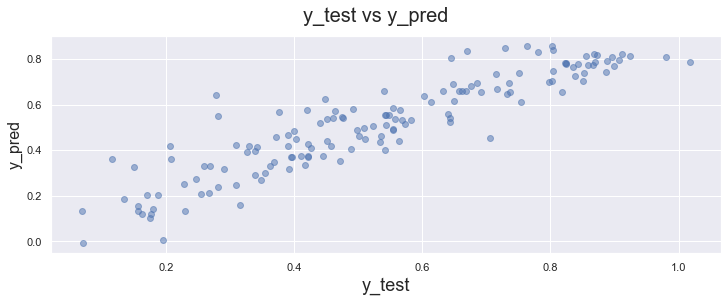

In [70]:
fig = plt.figure()
plt.scatter(ytest, pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

In [71]:
from sklearn.metrics import r2_score
r2_score(ytest,pred)

0.8262064280202289

In [72]:
r2=0.8262064280202289
n = xtest[x_new.columns].shape[0]
p = xtest[x_new.columns].shape[1]
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.8133328300958014

##  Goodness of model


$$Train Model   R^2 =0.824$$ 
$$Train Model  Adjusted R^2=0.820$$

$$Predicted    R^2 =0.826$$ 
$$Predicted  Adjusted R^2=0.813$$

As we are working on multiple variable for linear regression Hence We take Adjusted R^2 for both Train and Test
As we saw that test Adjusted R^2 is near to Train Adjusted R^2, So we can state that model is "GOOD"

 ## Top 3 features based on coef  

In [73]:
pd.read_html(lr10.summary().tables[1].as_html(),header=0,index_col=0)[0].coef[1:].abs().sort_values(ascending=False)[:3].index

Index(['temp', 'weathersit_3', 'yr'], dtype='object')

# Assignment-based Subjective Questions

<b> Q1) From your analysis of the categorical variables from the dataset, what could you infer about
their effect on the dependent variable? </b><br />
we can infer below observation:
* Over 5K booking is happening on the Season3, Season2 and Season 4 wherease we observe that less then 3.5k booking is happening on season 1
* Over 4k boking happening on the range between 4 to 10.
* Over 4k booking is only happening in weathersit 1.
* most of the Bike booking happening when thers is a working day
* Weekday is independent, All the days have marginly same count <br />

<b>Q2) Why is it important to use drop_first=True during dummy variable creation? </b>
* drop_first=True,is important because importance or value of that left over variable can be found by remaining variables .So to avoid redundancy we are dropping a column. for ex: I have 3 friends Neha, Niti and Nitya and if i am introducing Neha and Niti to my brother, then automatically my brother know who is Nitya. So once we create dummies for n-1 categories it’s definite what the nth category is 

<b>Q3) Looking at the pair-plot among the numerical variables, which one has the highest correlation
with the target variable? </b>
* temp

<b>Q4) How did you validate the assumptions of Linear Regression after building the model on the
training set? </b>
* Residual are normally distribuited
*There is No Multicollinearity between the predictor variables
*There is a linear relationship between temp,atemp and cnt

<b>Q5)Based on the final model, which are the top 3 features contributing significantly towards
explaining the demand of the shared bikes?</b>
* temp
* weathersit_3  (Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds)
* yr